The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.
Diabetes is the target variable being predicted, with values of 1 indicating the presence of diabetes and 0 indicating the absence of diabetes.

# Import Library 

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)


In [49]:
df = pd.read_csv ('diabetes_prediction.csv')
df.head(5)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [50]:
df.tail(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [51]:
df.shape

(100000, 9)

# Preprocessing

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [53]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [54]:
#Change the age file type to interger
df['age'] = df['age'].astype(int)

In [55]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140,0
1,Female,54,0,0,No Info,27.32,6.6,80,0
2,Male,28,0,0,never,27.32,5.7,158,0
3,Female,36,0,0,current,23.45,5.0,155,0
4,Male,76,1,1,current,20.14,4.8,155,0


In [56]:
df.duplicated().sum()

3888

In [81]:
df.dropna(inplace=True)

# EDA

In [82]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96112.000000,96112.000000,96112.000000,96112.000000,96112.000000,96112.000000,96112.000000
mean,41.798287,0.077628,0.040817,27.321923,5.532618,138.221013,0.088251
std,22.472901,0.267587,0.197867,6.768534,1.073288,40.911287,0.283661
min,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [83]:
# check statisctical description
df.describe(include = 'object')

,gender,smoking_history
count,96112,96112
unique,3,6
top,Female,never
freq,56142,34398


In [60]:
# Calculates average and median features for positive and negative diabetes classes 
mean_values = df.groupby('diabetes')[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']].mean()
median_values = df.groupby('diabetes')[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']].median()

print("Mean Values:")
print(mean_values)
print("\nMedian Values:")
print(median_values)


Mean Values:
                age        bmi  HbA1c_level  blood_glucose_level
diabetes                                                        
0         39.946856  26.869333     5.396894           132.819445
1         60.925961  31.997755     6.934827           194.026173

Median Values:
           age     bmi  HbA1c_level  blood_glucose_level
diabetes                                                
0         40.0  27.320          5.8                140.0
1         62.0  29.985          6.6                160.0


<Axes: xlabel='diabetes', ylabel='count'>

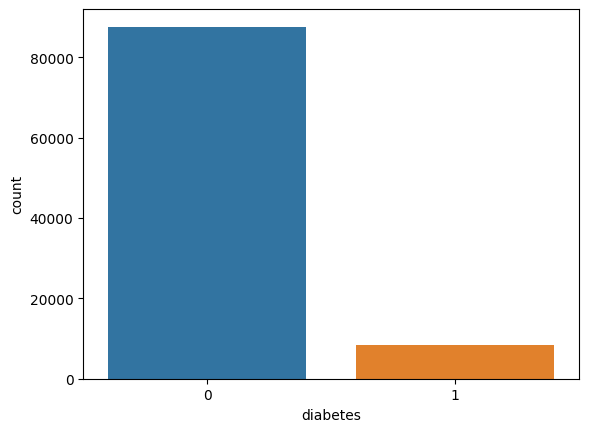

In [61]:
sns.countplot(x='diabetes', data = df)

In [67]:
diabetes_positive = df[df['diabetes'] == 1 ]
diabetes_negative = df[df['diabetes'] == 0 ]

In [ ]:
plt.figure(figsize= (8, 6))
sns.boxplot (x='diabetes' , y='age', data = df, showfliers= True)
plt.xlabel ('Diabetes')
plt.ylabel ('Age')
plt.title ('Boxplot of Age by Diabetes  Status')
plt.show()

In [ ]:
plt.figure(figsize = (8, 6))
sns.boxplot (x='diabetes', y='blood_glucose_level', data = df, showfliers = True)
plt.xlabel ('Diabetes')
plt.ylabel ('blood_glucose_level')
plt.title ('Boxplot of Blood Glucose Level by Diabetes Status')
plt.show()

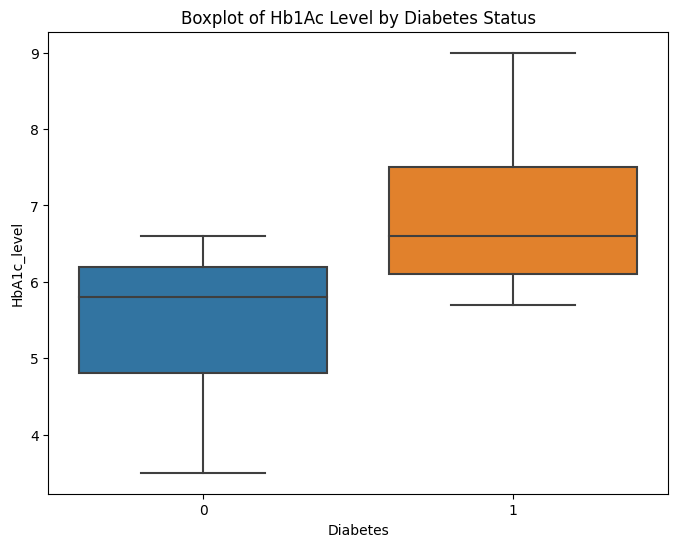

In [79]:
plt.figure(figsize = (8, 6))
sns.boxplot (x = 'diabetes', y = 'HbA1c_level', data = df showfliers = True)
plt.xlabel ('Diabetes')
plt.ylabel ('HbA1c_level')
plt.title ('Boxplot of Hb1Ac Level by Diabetes Status')
plt.show()

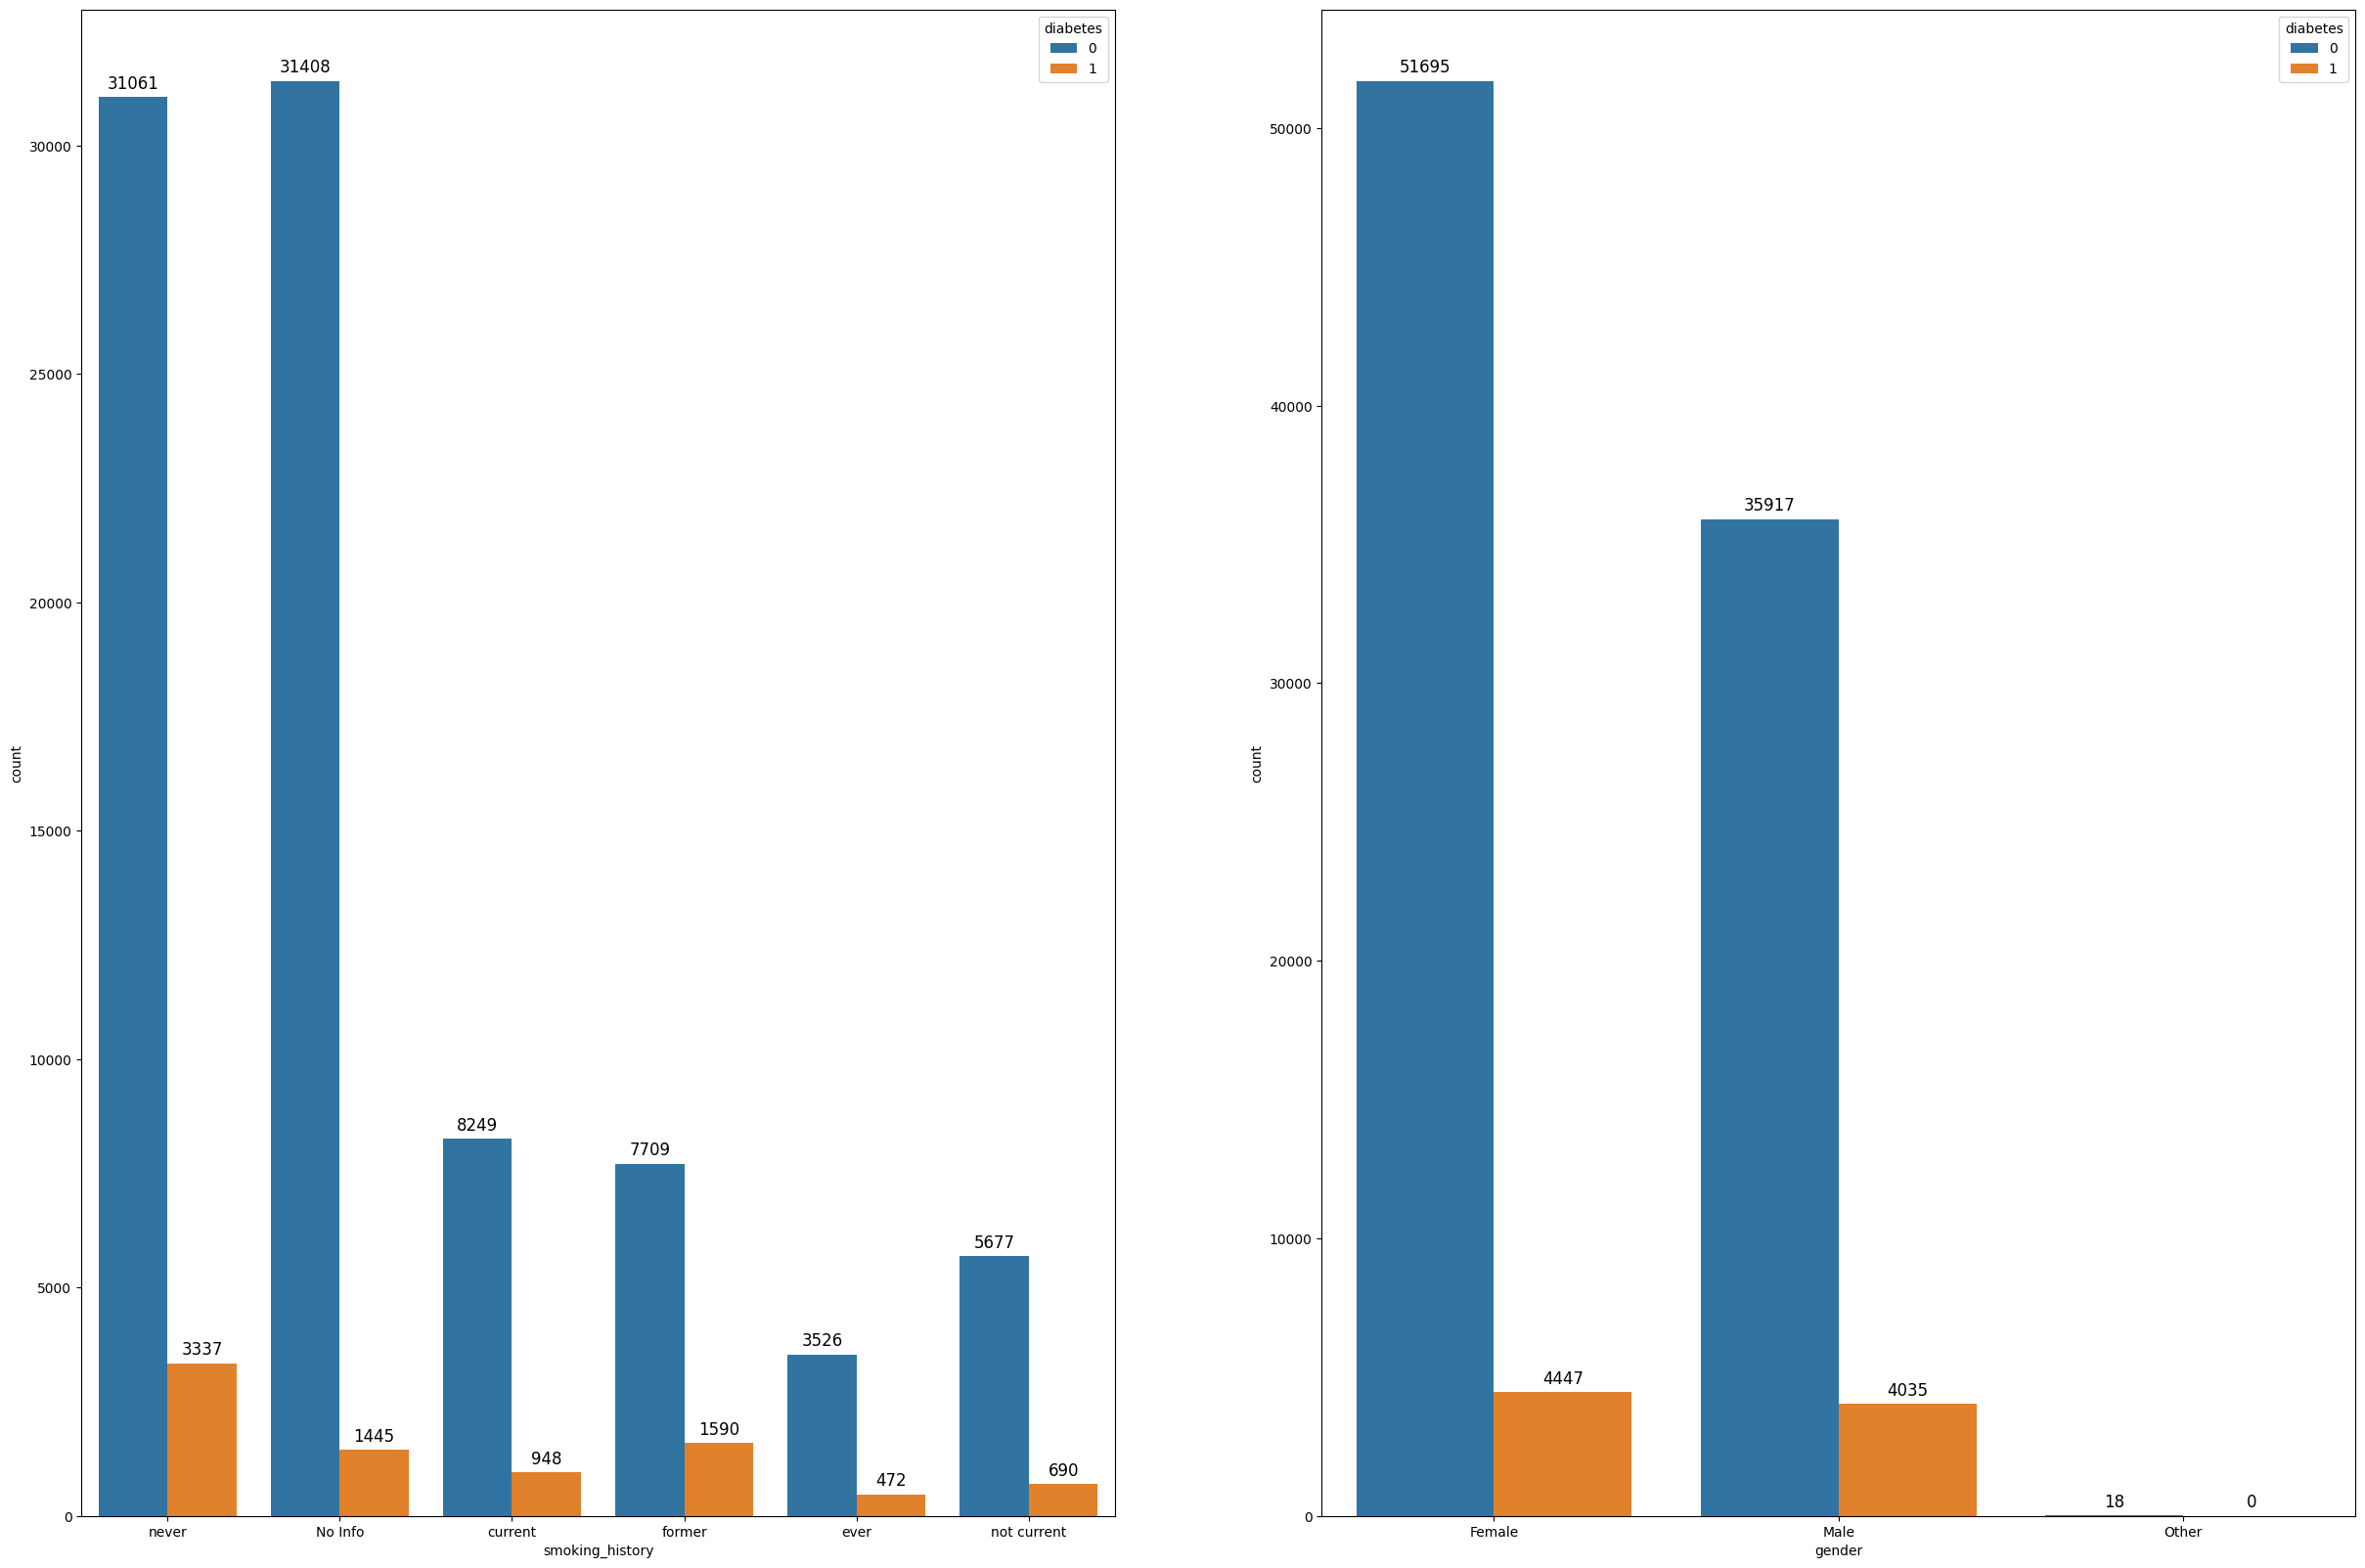

In [62]:
fig, axarr = plt.subplots(1, 2, figsize=(30, 20))
sns.countplot(x='smoking_history', hue='diabetes', data=df, ax=axarr[0])
sns.countplot(x='gender', hue='diabetes', data=df, ax=axarr[1])

for ax in axarr:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                    textcoords='offset points')
plt.show()

<Axes: xlabel='diabetes', ylabel='blood_glucose_level'>

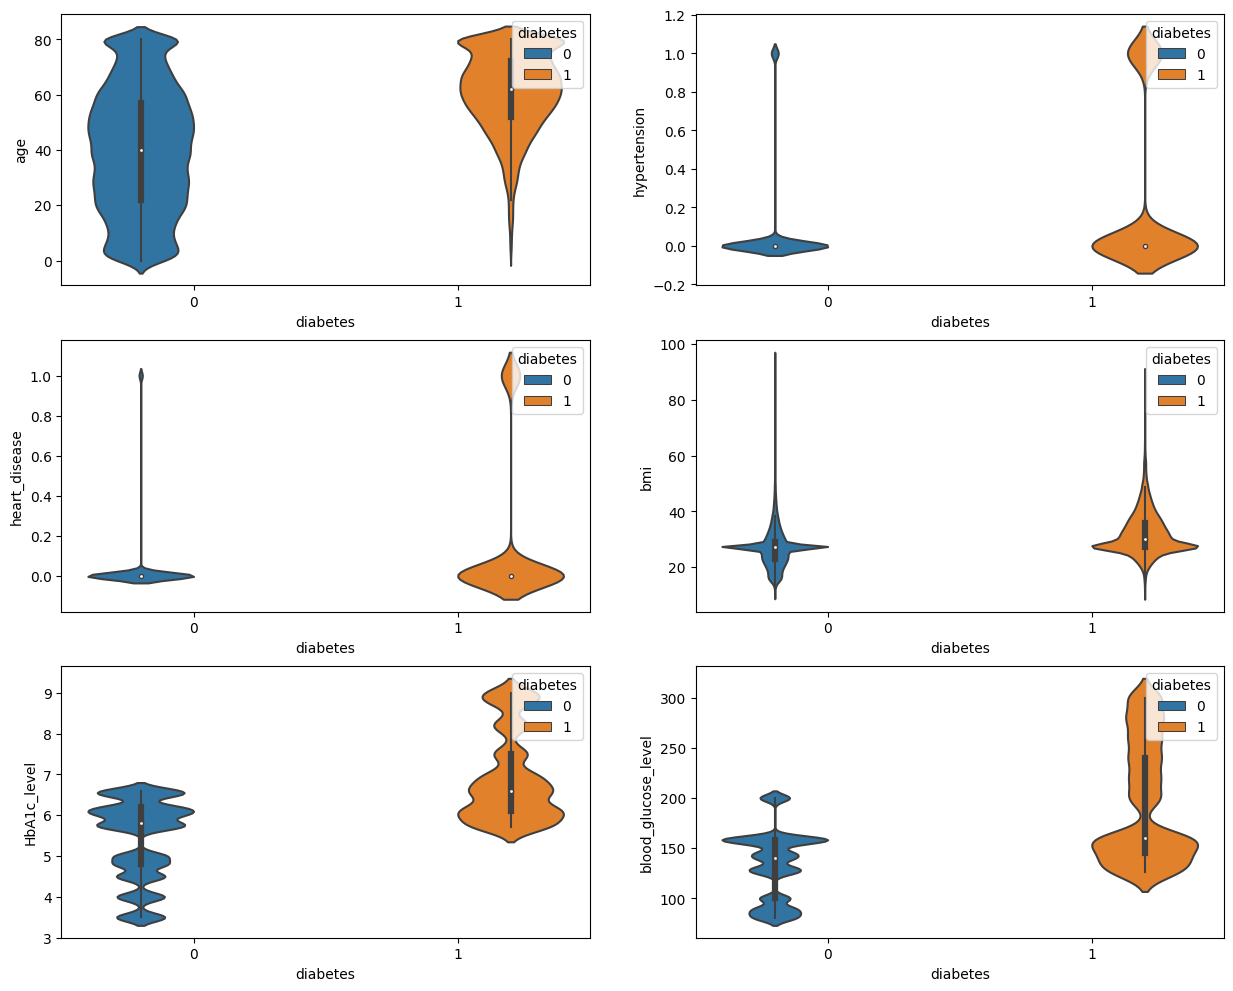

In [63]:
fig, axarr = plt.subplots(3,2, figsize=(15,12))
sns.violinplot(y='age', x = 'diabetes', hue = 'diabetes', data = df, ax=axarr[0][0])
sns.violinplot(y='hypertension', x = 'diabetes', hue = 'diabetes', data = df, ax=axarr[0][1])
sns.violinplot(y='heart_disease', x = 'diabetes', hue = 'diabetes', data = df, ax=axarr[1][0])
sns.violinplot(y='bmi', x = 'diabetes', hue = 'diabetes', data = df, ax=axarr[1][1])
sns.violinplot(y='HbA1c_level', x = 'diabetes', hue = 'diabetes', data = df, ax=axarr[2][0])
sns.violinplot(y='blood_glucose_level', x = 'diabetes', hue = 'diabetes', data = df, ax=axarr[2][1])

C:\Users\User\AppData\Local\Temp\ipykernel_3768\4284634824.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = df.corr()


<Axes: >

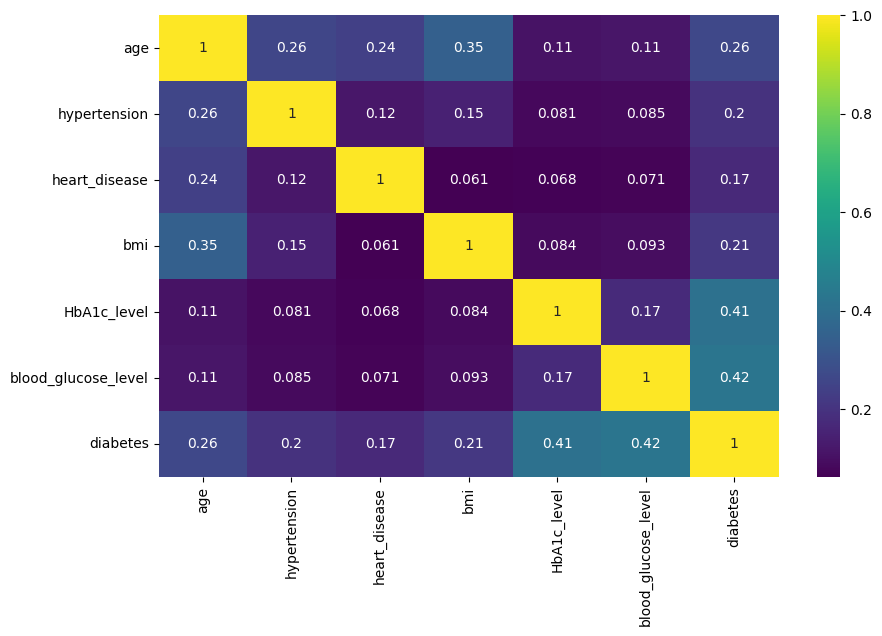

In [64]:
#Correlation Matrix
cm = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot = True, cmap = 'viridis')

# Perform Hypothesis Tests

In [ ]:
#chi_square
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['gender'], df['diabetes'])

# Melakukan uji chi-square
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Menampilkan hasil
print("Chi-square test results:")
print("Chi-square statistic:", chi2)
print("p-value:", p_value)


The results of the Chi-Square test showed that there was a significant relationship between the "gender" feature and the target variable "diabetes".

# Perform a t test

In [ ]:
from scipy.stats import ttest_ind

# Memisahkan dataset menjadi kelompok diabetes positif dan negatif
positive_group = df[df['diabetes'] == 1]['age']
negative_group = df[df['diabetes'] == 0]['age']

# Melakukan uji t
t_statistic, p_value = ttest_ind(positive_group, negative_group)

# Menampilkan hasil
print("t-test results:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)


The results of the T-test showed that there was a significant difference between the two groups in the features tested

In [ ]:
positive_group = df[df['diabetes'] == 1]['HbA1c_level']
negative_group = df[df['diabetes'] == 0]['HbA1c_level']


t_statistic, p_value = ttest_ind(positive_group, negative_group)

# Menampilkan hasil
print("t-test results:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Data Preparation for Model Fitting

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encoding the 'gender' column
label_encoder = LabelEncoder()
df['gender_encoded'] = label_encoder.fit_transform(df['gender'])
df['smoking_history_encoded'] = label_encoder.fit_transform(df['smoking_history'])
df.drop(['gender', 'smoking_history'], axis=1, inplace=True)


In [ ]:
df.head()

In [ ]:
from sklearn.model_selection import train_test_split

#split Train dan Test
X = df.drop(columns = ["diabetes"])
y = df["diabetes"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25,
                                                    random_state = 42)

In [ ]:
print (len(X_train))
print (len(X_test))

# Model Fitting and Selection

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Scoring function
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [85]:
# Fit logistic regression
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [86]:
# Fit KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [87]:
#fit Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [88]:
#fit Random Forest Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

## Review Best Model

In [104]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

# Memprediksi nilai target dengan menggunakan model Regresi Logistik
y_pred_log = log.predict(X_test)
y_proba_log = log.predict_proba(X_test)[:, 1]

# Evaluasi model Regresi Logistik
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
auc_log = roc_auc_score(y_test, y_proba_log)

print("Model Regresi Logistik:")
print("Akurasi:", accuracy_log)
print("Presisi:", precision_log)
print("Recall:", recall_log)
print("AUC-ROC:", auc_log)
print()
print(classification_report(y_test, y_pred_log))
print()

Model Regresi Logistik:
Akurasi: 0.957174962543699
Presisi: 0.8725099601593626
Recall: 0.6108786610878661
AUC-ROC: 0.9599019300396513

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     21877
           1       0.87      0.61      0.72      2151

    accuracy                           0.96     24028
   macro avg       0.92      0.80      0.85     24028
weighted avg       0.95      0.96      0.95     24028




In [105]:
# Memprediksi nilai target dengan menggunakan model K-Nearest Neighbors
y_pred_knn = knn.predict(X_test)
y_proba_knn = knn.predict_proba(X_test)[:, 1]

# Evaluasi model K-Nearest Neighbors
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, y_proba_knn)

print("Model K-Nearest Neighbors:")
print("Akurasi:", accuracy_knn)
print("Presisi:", precision_knn)
print("Recall:", recall_knn)
print("AUC-ROC:", auc_knn)
print()
print(classification_report(y_test, y_pred_knn))
print()

Model K-Nearest Neighbors:
Akurasi: 0.9491426668886299
Presisi: 0.8500376789751318
Recall: 0.5244072524407253
AUC-ROC: 0.8797722833422236

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     21877
           1       0.85      0.52      0.65      2151

    accuracy                           0.95     24028
   macro avg       0.90      0.76      0.81     24028
weighted avg       0.95      0.95      0.94     24028




In [106]:
# Memprediksi nilai target dengan menggunakan model Decision Tree
y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:, 1]

# Evaluasi model Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
auc_dt = roc_auc_score(y_test, y_proba_dt)

print("Model Decision Tree:")
print("Akurasi:", accuracy_dt)
print("Presisi:", precision_dt)
print("Recall:", recall_dt)
print("AUC-ROC:", auc_dt)
print()
print(classification_report(y_test, y_pred_dt))
print()

Model Decision Tree:
Akurasi: 0.947894123522557
Presisi: 0.6931671680275032
Recall: 0.7498837749883775
AUC-ROC: 0.8585090510792271

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     21877
           1       0.69      0.75      0.72      2151

    accuracy                           0.95     24028
   macro avg       0.83      0.86      0.85     24028
weighted avg       0.95      0.95      0.95     24028




In [107]:
# Memprediksi nilai target dengan menggunakan model Random Forest
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)

print("Model Random Forest:")
print("Akurasi:", accuracy_rf)
print("Presisi:", precision_rf)
print("Recall:", recall_rf)
print("AUC-ROC:", auc_rf)
print()
print(classification_report(y_test, y_pred_rf))
print()

Model Random Forest:
Akurasi: 0.9683286166139504
Presisi: 0.9554390563564875
Recall: 0.6778242677824268
AUC-ROC: 0.964398542232239

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     21877
           1       0.96      0.68      0.79      2151

    accuracy                           0.97     24028
   macro avg       0.96      0.84      0.89     24028
weighted avg       0.97      0.97      0.97     24028




## SMOTE

In [108]:
# Menggunakan metode SMOTE untuk oversampling data
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)


In [109]:
# Melatih model Random Forest dengan data yang telah di-SMOTE
rf_smote = RandomForestClassifier()
rf_smote.fit(X_smote, y_smote)

RandomForestClassifier()

In [110]:
# Memprediksi nilai target dengan menggunakan model Random Forest setelah SMOTE
y_pred_smote = rf_smote.predict(X_test)

# Evaluasi model Random Forest setelah SMOTE
accuracy_smote = accuracy_score(y_test, y_pred_smote)
precision_smote = precision_score(y_test, y_pred_smote)
recall_smote = recall_score(y_test, y_pred_smote)
auc_smote = roc_auc_score(y_test, rf_smote.predict_proba(X_test)[:, 1])

print("Model Random Forest setelah SMOTE:")
print("Akurasi:", accuracy_smote)
print("Presisi:", precision_smote)
print("Recall:", recall_smote)
print("AUC-ROC:", auc_smote)
print()
print(classification_report(y_test, y_pred_smote))
print()


Model Random Forest setelah SMOTE:
Akurasi: 0.9528882969868486
Presisi: 0.7355524734165511
Recall: 0.7396559739655973
AUC-ROC: 0.9660747601010994

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     21877
           1       0.74      0.74      0.74      2151

    accuracy                           0.95     24028
   macro avg       0.85      0.86      0.86     24028
weighted avg       0.95      0.95      0.95     24028




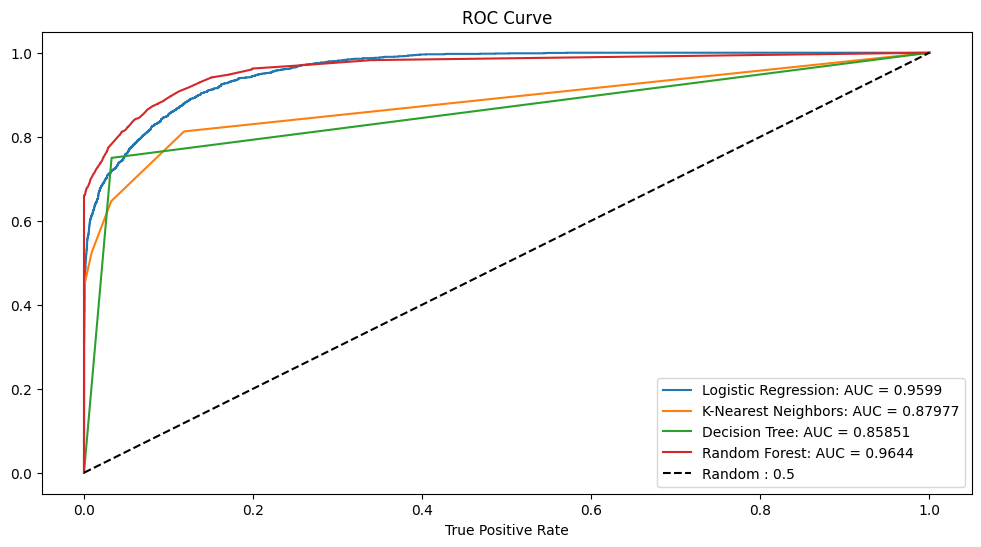

In [111]:
# Plotting kurva ROC
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(12, 6), linewidth=1)
plt.plot(fpr_log, tpr_log, label='Logistic Regression: AUC = ' + str(round(auc_log, 5)))
plt.plot(fpr_knn, tpr_knn, label='K-Nearest Neighbors: AUC = ' + str(round(auc_knn, 5)))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree: AUC = ' + str(round(auc_dt, 5)))
plt.plot(fpr_rf, tpr_rf, label='Random Forest: AUC = ' + str(round(auc_rf, 5)))
plt.plot([0, 1], [0, 1], 'k--', label='Random : 0.5')
plt.xlabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Feature Importance

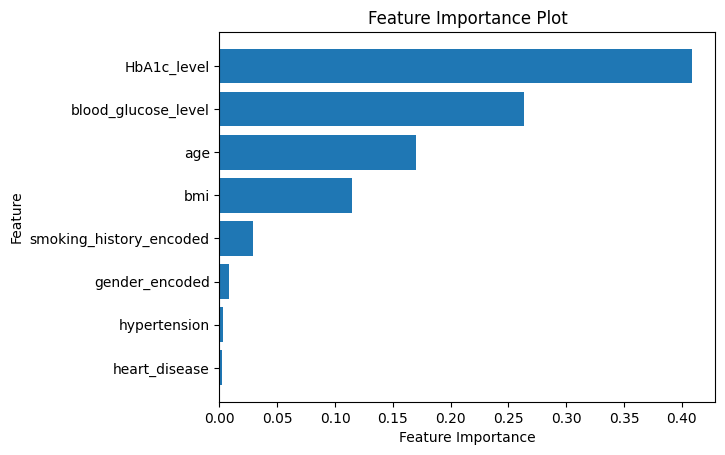

In [125]:
fi = rf_smote.feature_importances_
col = X_train.columns
fi_col = pd.DataFrame({'Feature Importance': fi, 'Feature': col})
fi_col = fi_col.sort_values('Feature Importance', ascending=True)

plt.barh(fi_col['Feature'], fi_col['Feature Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

In [126]:
df.groupby("diabetes") ["HbA1c_level"]. mean()

diabetes
0    5.396894
1    6.934827
Name: HbA1c_level, dtype: float64

In [127]:
pd.crosstab(df["blood_glucose_level"], df["diabetes"])
print(pd.crosstab(df["blood_glucose_level"], df["diabetes"]))

diabetes                0    1
blood_glucose_level           
80                   6782    0
85                   6631    0
90                   6819    0
100                  6770    0
126                  6782  636
130                  6778  690
140                  6788  625
145                  6708  662
155                  6686  598
158                  6735    0
159                  6809  666
160                  6702  694
200                  6640  647
220                     0  600
240                     0  633
260                     0  634
280                     0  724
300                     0  673
